In [111]:
# Install Liablaries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [113]:
# get dataset names
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### Load Dataset

In [114]:
df = sns.load_dataset("taxis")

### Data Preprocessing

In [115]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [116]:
df = df[['passengers','distance', 'fare', 'tip','total']]

In [117]:
df.head()

,passengers,distance,fare,tip,total
0,1,1.60,7.0,2.15,12.95
1,1,0.79,5.0,0.00,9.30
2,1,1.37,7.5,2.36,14.16
3,1,7.70,27.0,6.15,36.95
4,3,2.16,9.0,1.10,13.40


In [118]:
df.sample(5)

,passengers,distance,fare,tip,total
5495,1,16.71,50.74,0.00,57.00
4240,1,1.70,8.00,1.77,13.57
5572,1,0.95,5.50,1.89,8.19
667,1,1.63,12.00,3.82,19.12
2884,5,1.96,12.50,3.16,18.96


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   passengers  6433 non-null   int64  
 1   distance    6433 non-null   float64
 2   fare        6433 non-null   float64
 3   tip         6433 non-null   float64
 4   total       6433 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 251.4 KB


In [120]:
# zeros count
df['passengers'].value_counts()

passengers
1    4678
2     876
5     277
3     243
6     153
4     110
0      96
Name: count, dtype: int64

In [121]:
#replace zero with mean value
df.mode()

,passengers,distance,fare,tip,total
0,1,0.8,7.5,0.0,9.3


In [122]:
df['passengers'] = df['passengers'].replace(0, 1)

In [123]:
df['passengers'].value_counts()

passengers
1    4774
2     876
5     277
3     243
6     153
4     110
Name: count, dtype: int64

In [124]:
df.rename(columns={'total':'act_fare'}, inplace=1)

In [125]:
df['total_fare'] = df['fare'] + df['tip']

In [126]:
df['extra_amt'] = df['act_fare'] - df['total_fare']

In [127]:
df.drop(columns=['fare', 'tip'],inplace=True)

In [128]:
df.drop(columns=['total_fare'],inplace=True)

In [129]:
df.sample(8)

,passengers,distance,act_fare,extra_amt
13,1,1.75,13.80,3.3
2484,1,1.27,12.54,3.8
3530,1,0.88,9.80,3.8
3745,1,3.16,22.56,3.3
1402,4,2.03,18.36,3.3
2260,2,1.50,10.80,3.3
5484,1,3.00,17.30,0.8
603,5,2.07,15.96,3.8


### EDA

In [130]:
df.describe()

,passengers,distance,act_fare,extra_amt
count,6433.000000,6433.000000,6433.000000,6433.000000
mean,1.554174,3.024617,18.517794,3.447502
std,1.190719,3.827867,13.815570,1.796459
min,1.000000,0.000000,1.300000,0.000000
25%,1.000000,0.980000,10.800000,3.300000
50%,1.000000,1.640000,14.160000,3.300000
75%,2.000000,3.210000,20.300000,3.800000
max,6.000000,36.700000,174.820000,24.820000


- Relationship between the data

<Axes: title={'center': 'Act_Fare by Distance'}, xlabel='act_fare', ylabel='distance'>

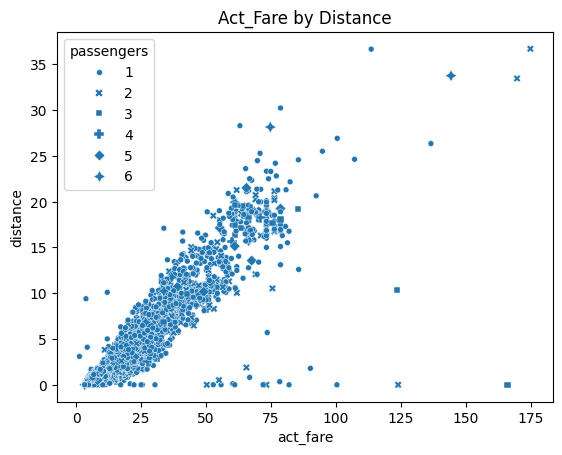

In [131]:
plt.title('Act_Fare by Distance')
sns.scatterplot(df, x= 'act_fare', y= 'distance', style='passengers', size='passengers')

Text(0.5, 1.0, 'Act_fare by Extra_amt')

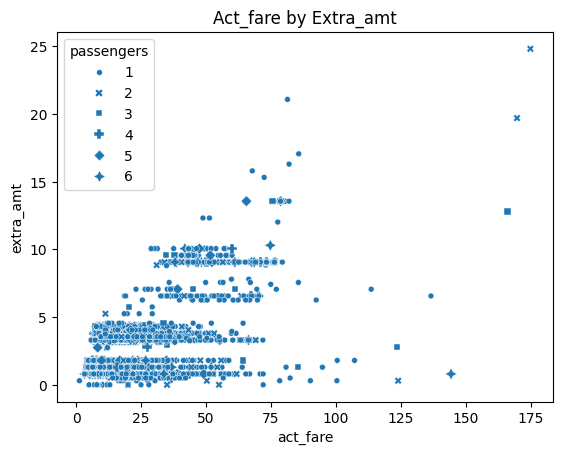

In [132]:
sns.scatterplot(df, x= 'act_fare', y= 'extra_amt', style='passengers', size= 'passengers')
plt.title('Act_fare by Extra_amt')

<Axes: title={'center': 'Distance by Platform_fee'}, xlabel='distance', ylabel='extra_amt'>

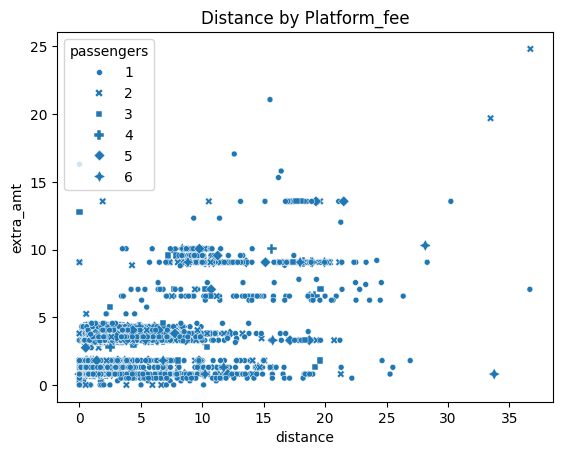

In [133]:
plt.title('Distance by Platform_fee')
sns.scatterplot(df, x= 'distance', y= 'extra_amt', style='passengers', size= 'passengers')

<Axes: title={'center': 'Passengers by Act_fare'}, xlabel='passengers', ylabel='act_fare'>

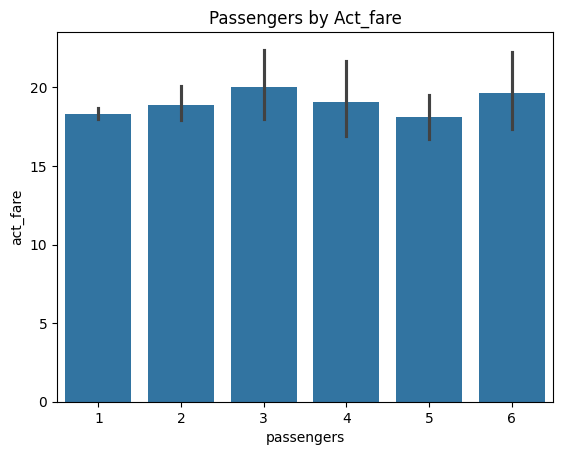

In [134]:
plt.title('Passengers by Act_fare')
sns.barplot(df, x='passengers', y='act_fare')

<Axes: title={'center': 'Act_fare by Distance (R)'}, xlabel='act_fare', ylabel='distance'>

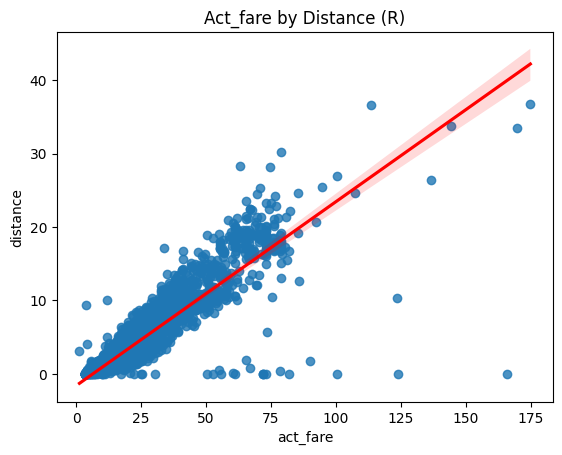

In [135]:
plt.title('Act_fare by Distance (R)')
sns.regplot(df, x= 'act_fare', y= 'distance', line_kws=dict(color='r'))

<Axes: title={'center': 'Act_fare by Extra_amt (R)'}, xlabel='act_fare', ylabel='extra_amt'>

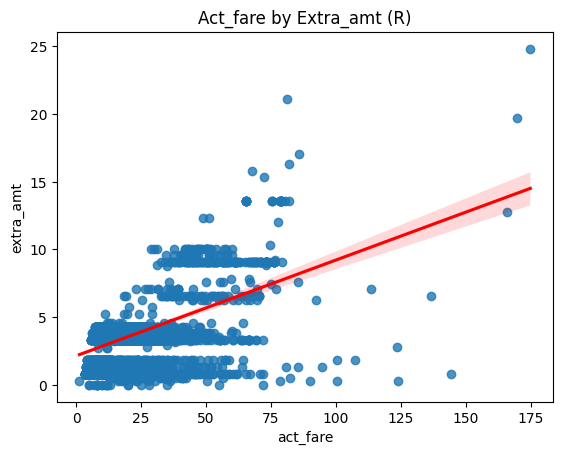

In [136]:
plt.title('Act_fare by Extra_amt (R)')
sns.regplot(df, x= 'act_fare', y= 'extra_amt', line_kws=dict(color='r'))

<Axes: title={'center': 'Distance by Extra_amt (R)'}, xlabel='distance', ylabel='extra_amt'>

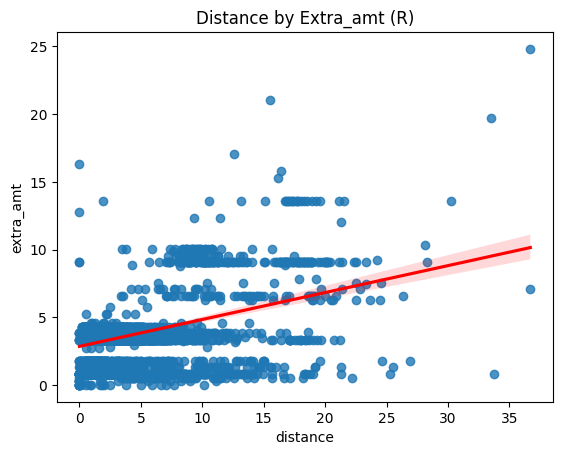

In [137]:
plt.title('Distance by Extra_amt (R)')
sns.regplot(df, x= 'distance', y= 'extra_amt', line_kws=dict(color='r'))

- Data distributions

In [138]:
df.columns

Index(['passengers', 'distance', 'act_fare', 'extra_amt'], dtype='object')

Text(0.5, 1.0, 'Passengers Distribution')

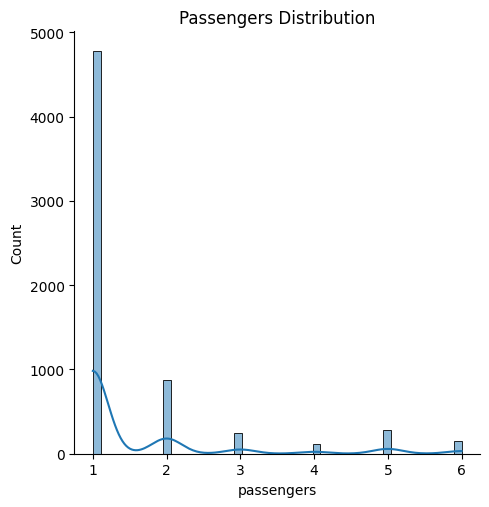

In [139]:
sns.displot(df, x= 'passengers', kde = True)
plt.title('Passengers Distribution')

Text(0.5, 1.0, 'Distance Distribution')

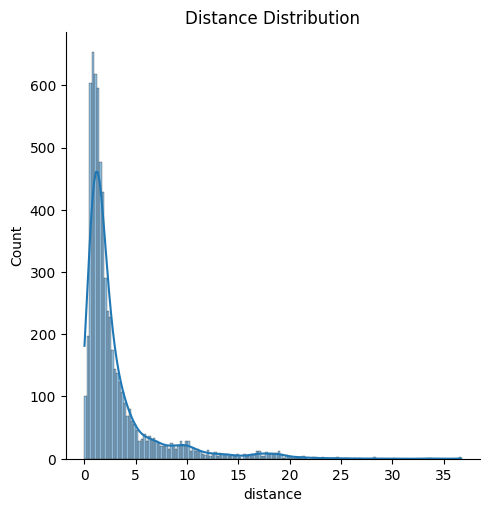

In [140]:
sns.displot(df, x= 'distance', kde = True)
plt.title('Distance Distribution')

Text(0.5, 1.0, 'Act_fare Distribution')

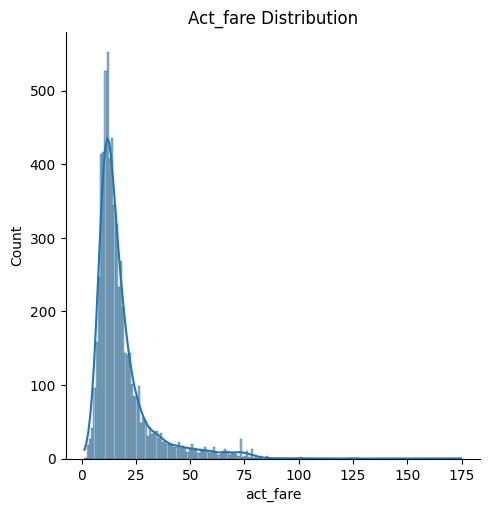

In [141]:
sns.displot(df, x= 'act_fare', kde = True)
plt.title('Act_fare Distribution')

Text(0.5, 1.0, 'Extra_amt Distribution')

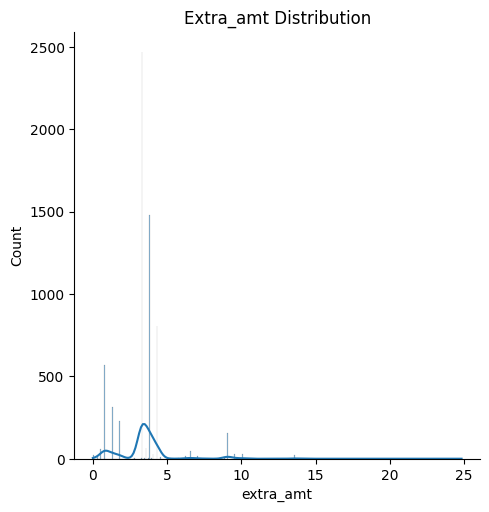

In [142]:
sns.displot(df, x= 'extra_amt', kde = True)
plt.title('Extra_amt Distribution')

### Feature Scaling

- Train Trset Split

In [143]:
X = df.drop(columns='act_fare')
y = df['act_fare']

In [144]:
X.head()

,passengers,distance,extra_amt
0,1,1.60,3.8
1,1,0.79,4.3
2,1,1.37,4.3
3,1,7.70,3.8
4,3,2.16,3.3


In [145]:
y.head()

0    12.95
1     9.30
2    14.16
3    36.95
4    13.40
Name: act_fare, dtype: float64

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.10, random_state= 42)

In [148]:
X_train.shape

(5789, 3)

In [149]:
X_test.shape

(644, 3)

In [150]:
y_train.shape

(5789,)

In [151]:
y_test.shape

(644,)

- Column Transformer

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()

In [154]:
scaler.fit_transform(X_train)

array([[ 0.37362325, -0.31470587,  0.47614511],
       [-0.46568796,  0.54933973, -1.45966782],
       [-0.46568796, -0.68650732,  0.47614511],
       ...,
       [-0.46568796, -0.55559132,  0.1996004 ],
       [-0.46568796,  0.42366037, -0.0769443 ],
       [-0.46568796, -0.55559132, -0.0769443 ]], shape=(5789, 3))

In [155]:
scaler.transform(X_test)

array([[-0.46568796, -0.45085851,  0.47614511],
       [-0.46568796, -0.42467531, -1.18312312],
       [ 0.37362325, -0.16546163,  0.1996004 ],
       ...,
       [-0.46568796, -0.46395011, -0.0769443 ],
       [-0.46568796,  4.34590376, -0.0769443 ],
       [-0.46568796,  1.04943885, -1.18312312]], shape=(644, 3))

- Train the model

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
model = LinearRegression()

In [158]:
model.fit(X_train,y_train)

LinearRegression()

In [159]:
y_pred = model.predict(X_test)

In [160]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7773390487289562


- Model Train using Decission Tree

In [161]:
from sklearn import tree

In [162]:
clf = tree.DecisionTreeRegressor()

In [163]:
clf.fit(X_train,y_train)

DecisionTreeRegressor()

In [164]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7773390487289562


### Create Pipeline

In [165]:
from sklearn.pipeline import Pipeline,make_pipeline

In [166]:
pipe = Pipeline([
    ('Scaler',scaler),
    ('model',model)
])

In [167]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('model', LinearRegression())])

In [168]:
# Code here
pipe.named_steps

{'Scaler': StandardScaler(), 'model': LinearRegression()}

In [169]:
df.columns

Index(['passengers', 'distance', 'act_fare', 'extra_amt'], dtype='object')

In [171]:
# input new values
passengers = float(input("Enter total no of passengers: "))
distance = float(input("Enter your distance (KM): "))
extra_amt = float(input("Enter your extra_amt: "))
value_input = np.array([passengers, distance, extra_amt ]).reshape(1,3)
pred = model.predict(value_input)
pred = pred[0]
print(f"Your total fare is: {pred}")

Your total fare is: 215.45163872389261


In [172]:
import joblib

In [173]:
joblib.dump(model, 'model.pkl')

['model.pkl']